<span style='font-size:40px; display:block;'>
<b>
    FLUXES
</b>
</span>

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# **Imports**

In [30]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


# **Load data**

In [31]:
SOURCEDIR = r"../80_FINALIZE"
FILENAME = r"81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
df

Loaded .parquet file ..\80_FINALIZE\81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet (1.005 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-12  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-18  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-24  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-6  .SWC_GF1_0.15_1_gfXG_MEAN3H-12  .SWC_GF1_0.15_1_gfXG_MEAN3H-18  .SWC_GF1_0.15_1_gfXG_MEAN3H-24  .SWC_GF1_0.15_1_gfXG_MEAN3H-6  .TS_GF1_0.04_1_gfXG_MEAN3H-12  .TS_GF1_0.04_1_gfXG_MEAN3H-18  .TS_GF1_0.04_1_gfXG_MEAN3H-24  .TS_GF1_0.04_1_gfXG_MEAN3H-6  .TS_GF1_0.15_1_gfXG_MEAN3H-12  .TS_GF1_0.15_1_gfXG_MEAN3H-18  .TS_GF1_0.15_1_gfXG_MEAN3H-24  ...  GPP_NT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF  GPP_DT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF_SD  GPP_DT_CUT_50_gfRF_SD  G_GF1_0.03_1  G_GF1_0.03_2  G_GF1_0.05_1  G_GF1_0.05_2  G_GF4_0.02_1  G_GF5_0.02_1  LW_OUT_T1_2_1  NETRAD_T1_2_1  PPFD_OUT_T1_2_2  SW_OUT_T1_2_1
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                              
2005-01-01 00:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.918553             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 00:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.917972             0.092682                 0.0                0.079688                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.163001             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN  

# **List of gap-filled flux variables**

In [32]:
fluxlist = [c for c in df.columns if str(c).endswith("gfRF")];
fluxlist

['NEE_L3.1_L3.3_CUT_16_QCF_gfRF',
 'NEE_L3.1_L3.3_CUT_50_QCF_gfRF',
 'NEE_L3.1_L3.3_CUT_84_QCF_gfRF',
 'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'H_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_16_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_84_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_16_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_84_QCF_gfRF',
 'RECO_NT_CUT_16_gfRF',
 'GPP_NT_CUT_16_gfRF',
 'RECO_DT_CUT_16_gfRF',
 'GPP_DT_CUT_16_gfRF',
 'RECO_NT_CUT_84_gfRF',
 'GPP_NT_CUT_84_gfRF',
 'RECO_DT_CUT_84_gfRF',
 'GPP_DT_CUT_84_gfRF',
 'RECO_NT_CUT_50_gfRF',
 'GPP_NT_CUT_50_gfRF',
 'RECO_DT_CUT_50_gfRF',
 'GPP_DT_CUT_50_gfRF']

# **Fluxes: gap-filled** (random forest)

## Main ecosystem fluxes

In [33]:
nee = 'NEE_L3.1_L3.3_CUT_50_QCF_gfRF'
le = 'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF'
h = 'H_L3.1_L3.3_CUT_NONE_QCF_gfRF'
n2o = 'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF'
ch4 = 'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF'
gpp = 'GPP_DT_CUT_50_gfRF'
reco = 'RECO_DT_CUT_50_gfRF'
fluxes = [nee, gpp, reco, le, h, n2o, ch4]
fluxes

['NEE_L3.1_L3.3_CUT_50_QCF_gfRF',
 'GPP_DT_CUT_50_gfRF',
 'RECO_DT_CUT_50_gfRF',
 'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'H_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF']

Flux units:
$$
\mathrm{NEE=\mu mol\ CO_{2}\ m^{-2}\ s^{-1}}
$$
$$
\mathrm{LE=W\ m^{-2}}
$$
$$
\mathrm{H=W\ m^{-2}}
$$
$$
\mathrm{N_{2}O=nmol\ N_{2}O\ m^{-2}\ s^{-1}}
$$
$$
\mathrm{CH_{4}=nmol\ CH_{4}\ m^{-2}\ s^{-1}}
$$

In [34]:
units_nee = r"$\mathrm{\mu mol\ CO_{2}\ m^{-2}\ s^{-1}}$"
units_gpp = r"$\mathrm{\mu mol\ CO_{2}\ m^{-2}\ s^{-1}}$"
units_reco = r"$\mathrm{\mu mol\ CO_{2}\ m^{-2}\ s^{-1}}$"
units_le = r"$\mathrm{W\ m^{-2}}$"
units_h = r"$\mathrm{W\ m^{-2}}$"
units_n2o = r"$\mathrm{nmol\ N_{2}O\ m^{-2}\ s^{-1}}$"
units_ch4 = r"$\mathrm{nmol\ CH_{4}\ m^{-2}\ s^{-1}}$"

## Heatmaps (half-hourly fluxes)

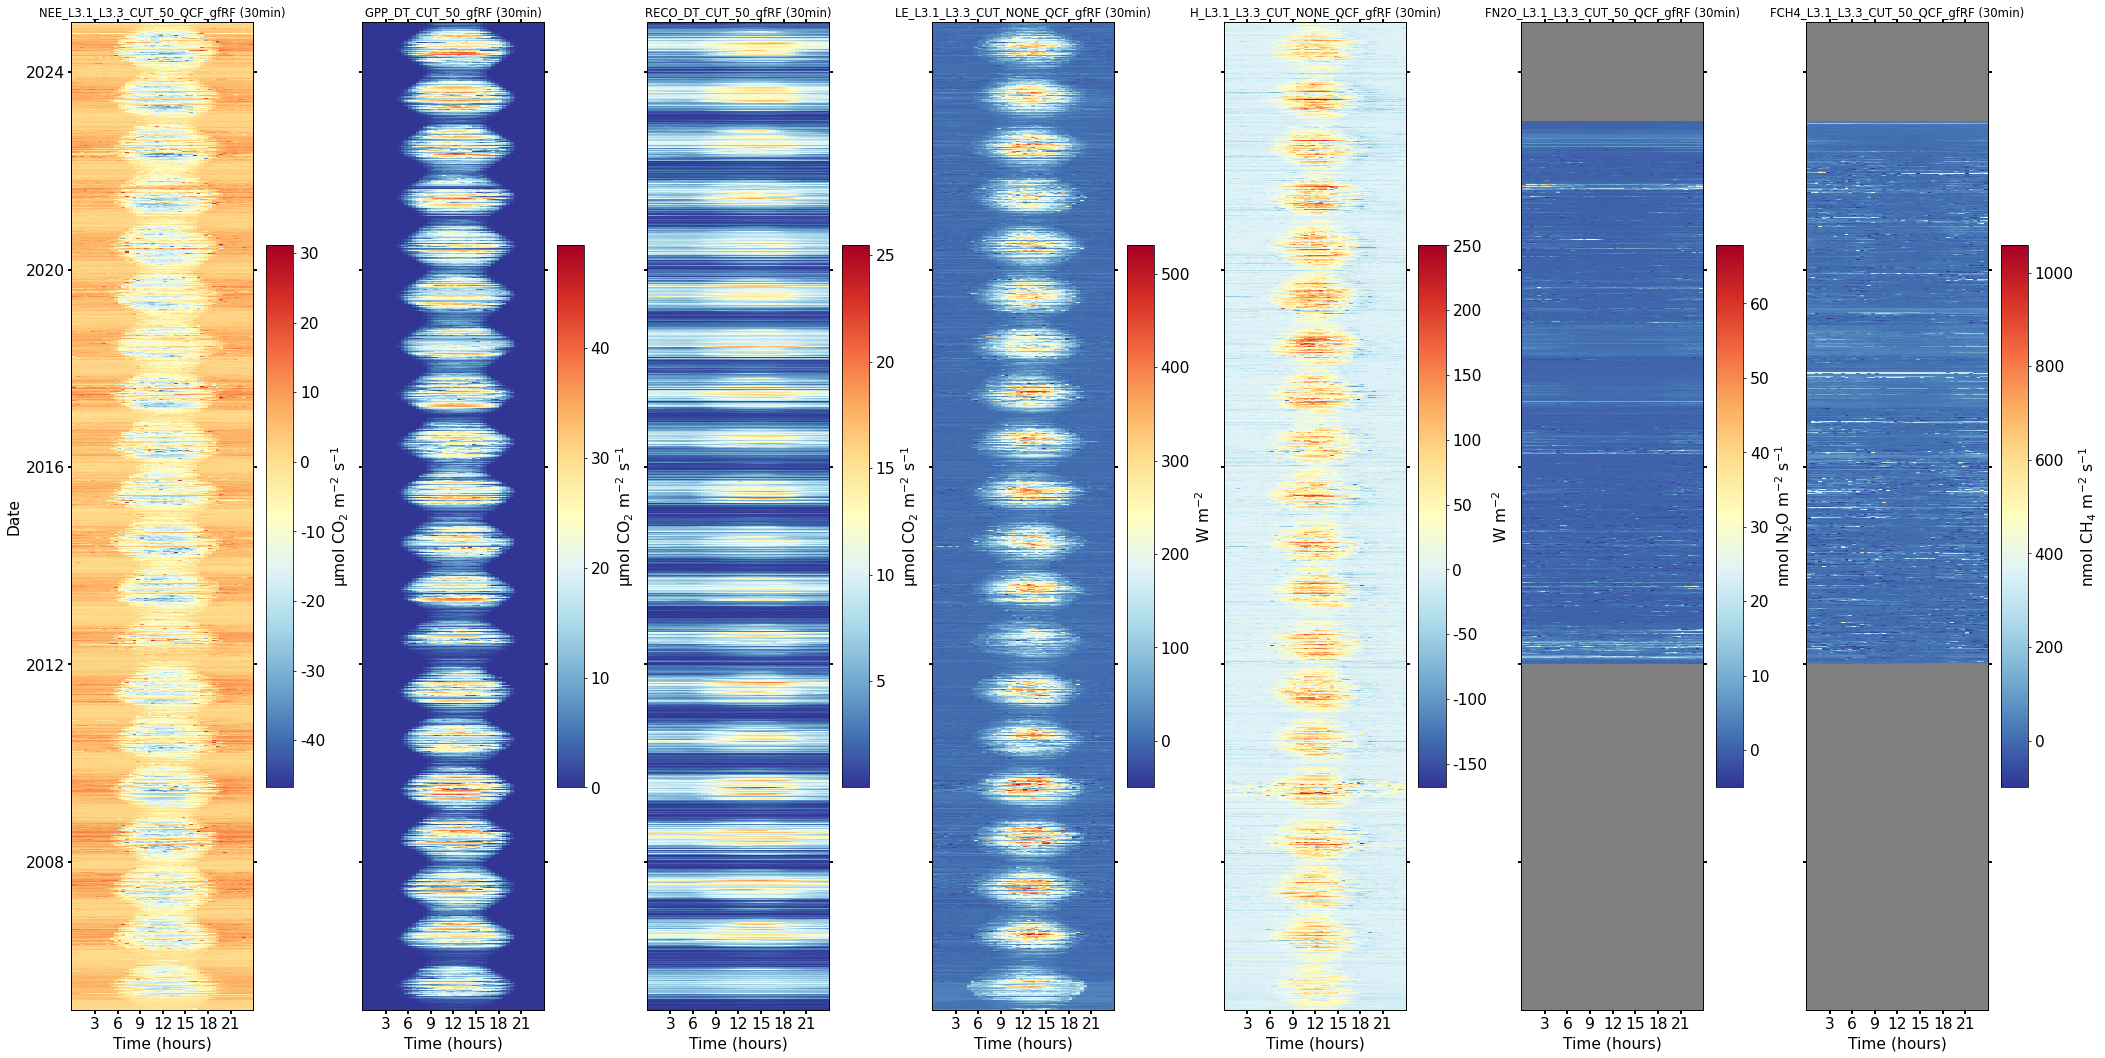

In [35]:
fig, axs = plt.subplots(ncols=7, figsize=(30, 15), dpi=70, layout="constrained")
dv.heatmapdatetime(series=df[nee], cb_digits_after_comma=0, ax=axs[0], zlabel=units_nee).plot()
dv.heatmapdatetime(series=df[gpp], cb_digits_after_comma=0, ax=axs[1], zlabel=units_gpp).plot()
dv.heatmapdatetime(series=df[reco], cb_digits_after_comma=0, ax=axs[2], zlabel=units_reco).plot()
dv.heatmapdatetime(series=df[le], cb_digits_after_comma=0, ax=axs[3], zlabel=units_le).plot()
dv.heatmapdatetime(series=df[h], cb_digits_after_comma=0, ax=axs[4], zlabel=units_h).plot()
dv.heatmapdatetime(series=df[n2o], cb_digits_after_comma=0, ax=axs[5], zlabel=units_n2o).plot()
dv.heatmapdatetime(series=df[ch4], cb_digits_after_comma=0, ax=axs[6], zlabel=units_ch4).plot()
hide_labels = [1, 2, 3, 4, 5, 6]
for h in hide_labels:
    axs[h].axes.get_yaxis().get_label().set_visible(False)
    plt.setp(axs[h].get_yticklabels(), visible=False)

## Heatmaps (monthly fluxes)

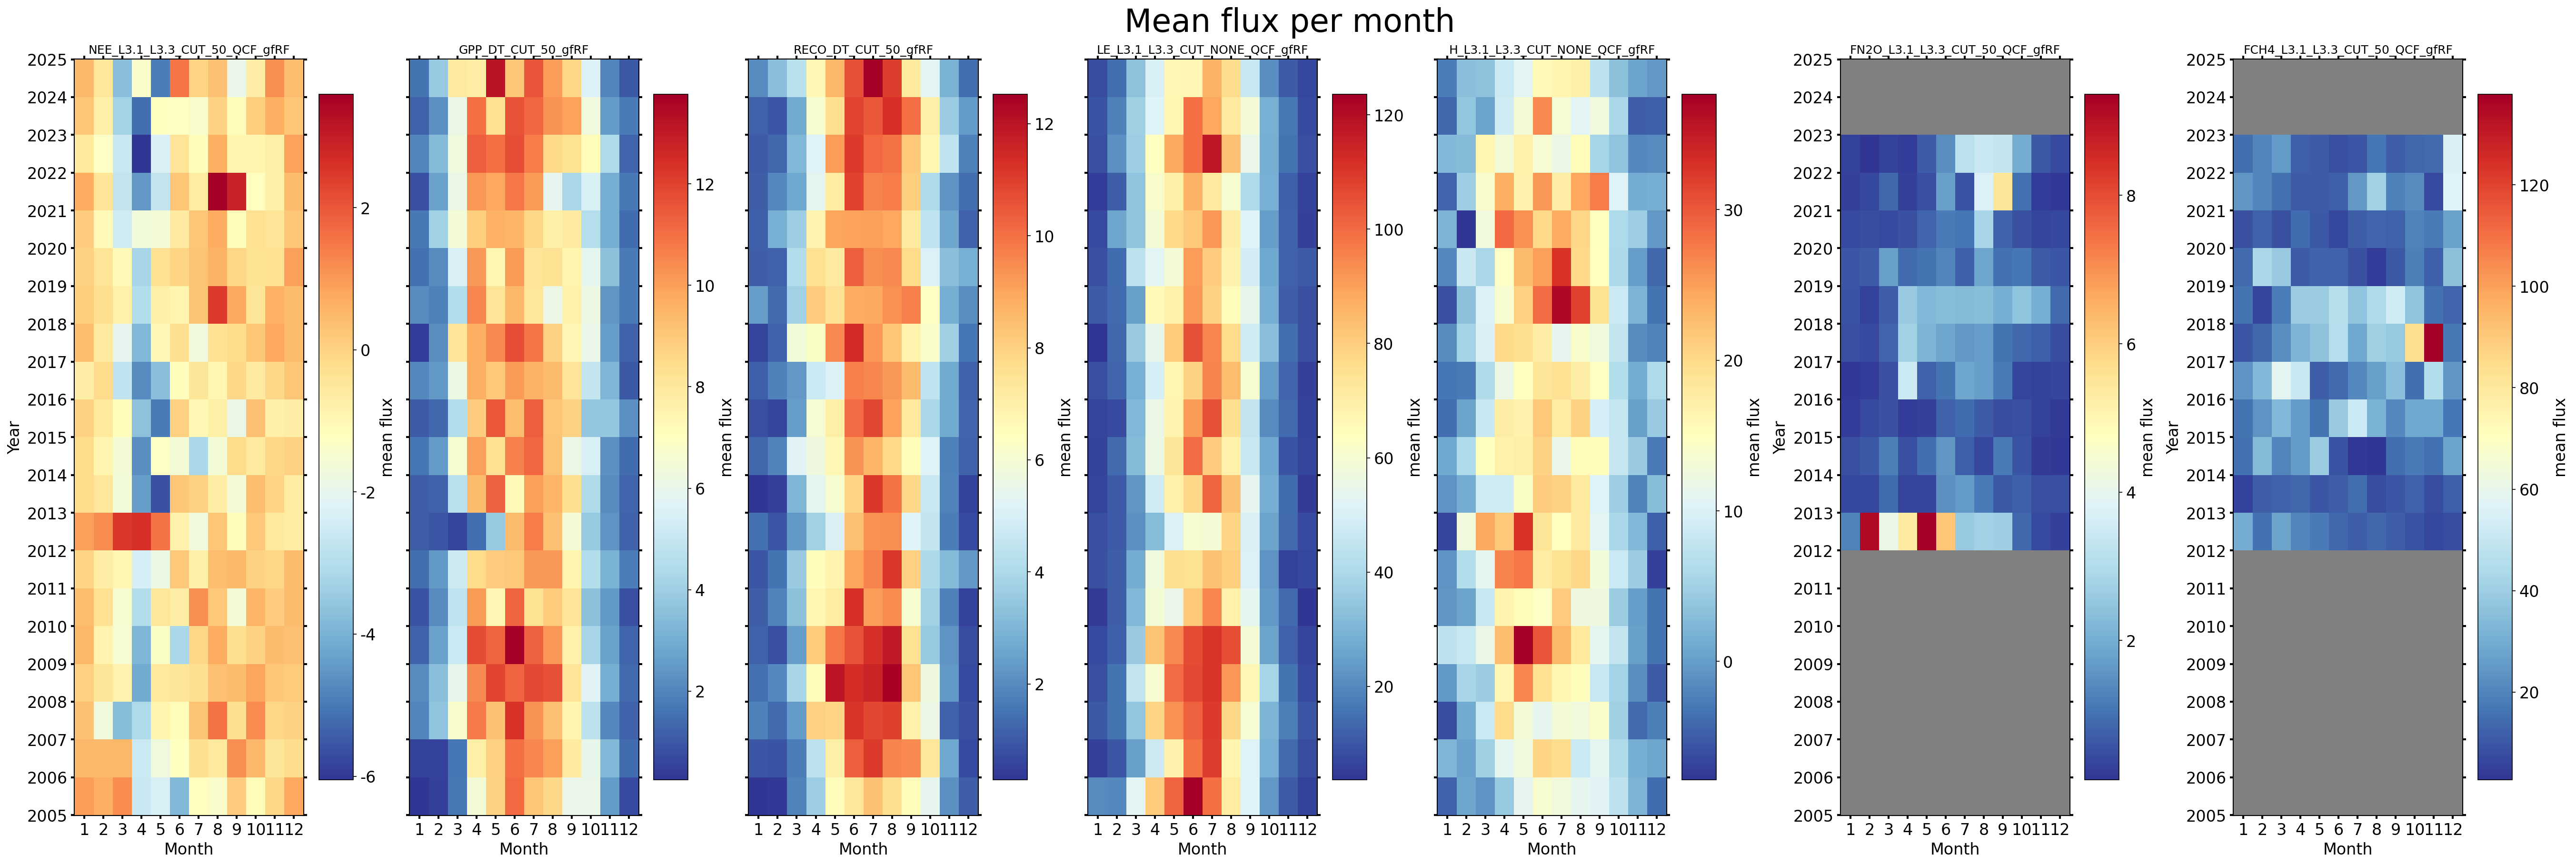

In [36]:
fig, axs = plt.subplots(ncols=7, figsize=(36, 12), dpi=150, layout="constrained")
fig.suptitle(f'Mean flux per month', fontsize=32)

for ix, f in enumerate(fluxes):
    s = df[f].resample('M').mean()        
    dv.heatmapyearmonth(series_monthly=s, title=s.name, ax=axs[ix], cb_digits_after_comma=0, zlabel="mean flux").plot()

# axs[0].axes.get_yaxis().get_label().set_visible(False)
hide_labels = [1, 2, 3, 4]
for h in hide_labels:
    axs[h].axes.get_yaxis().get_label().set_visible(False)
    plt.setp(axs[h].get_yticklabels(), visible=False)

## Cumulatives per year

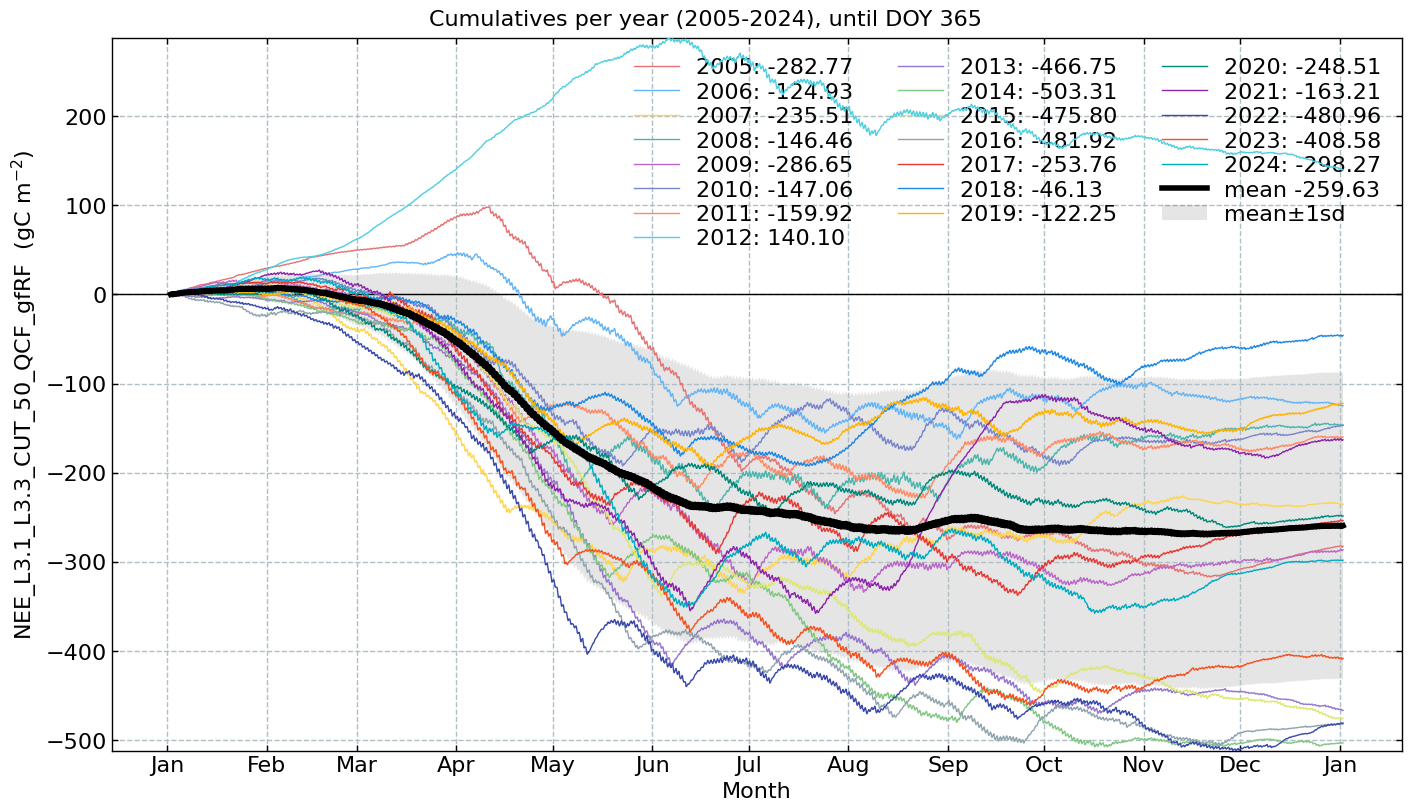

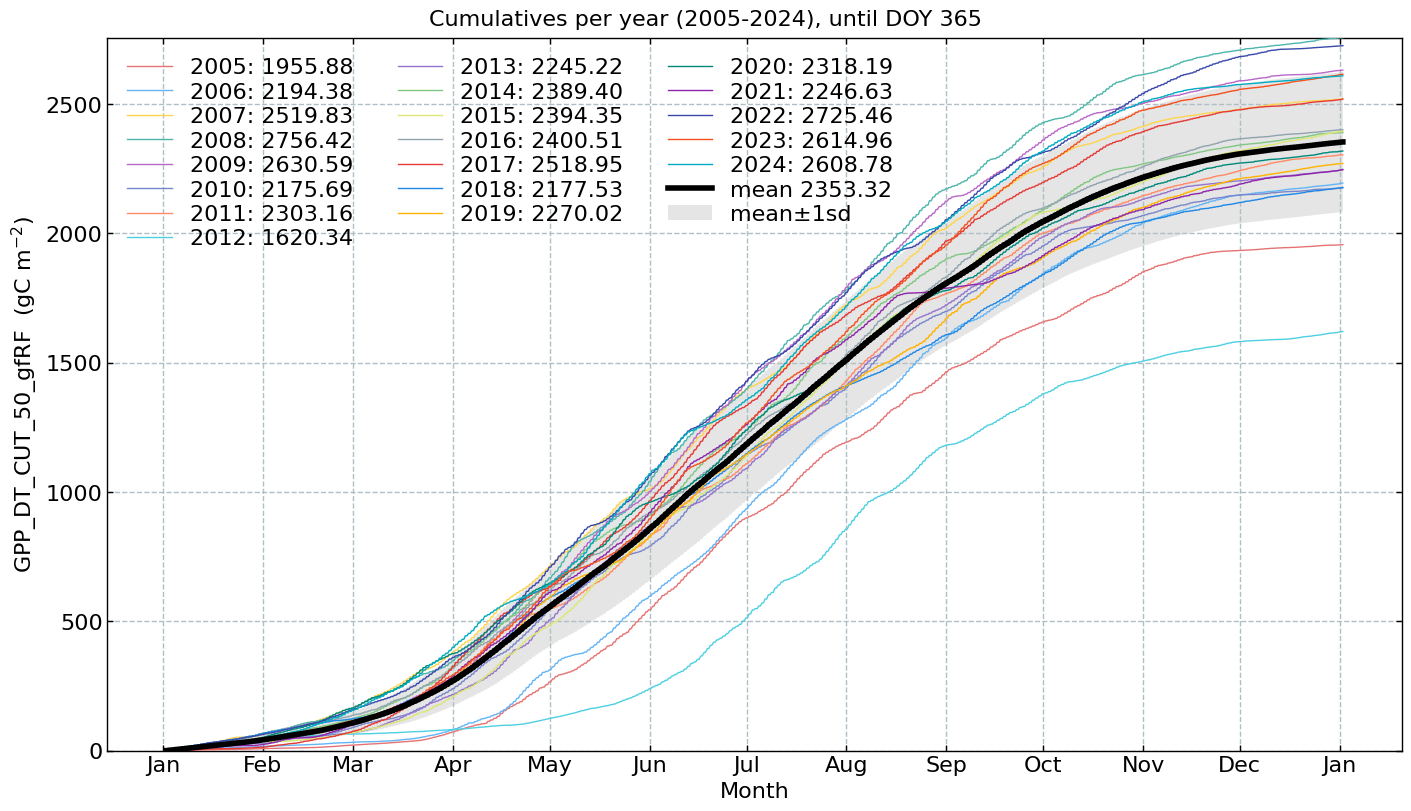

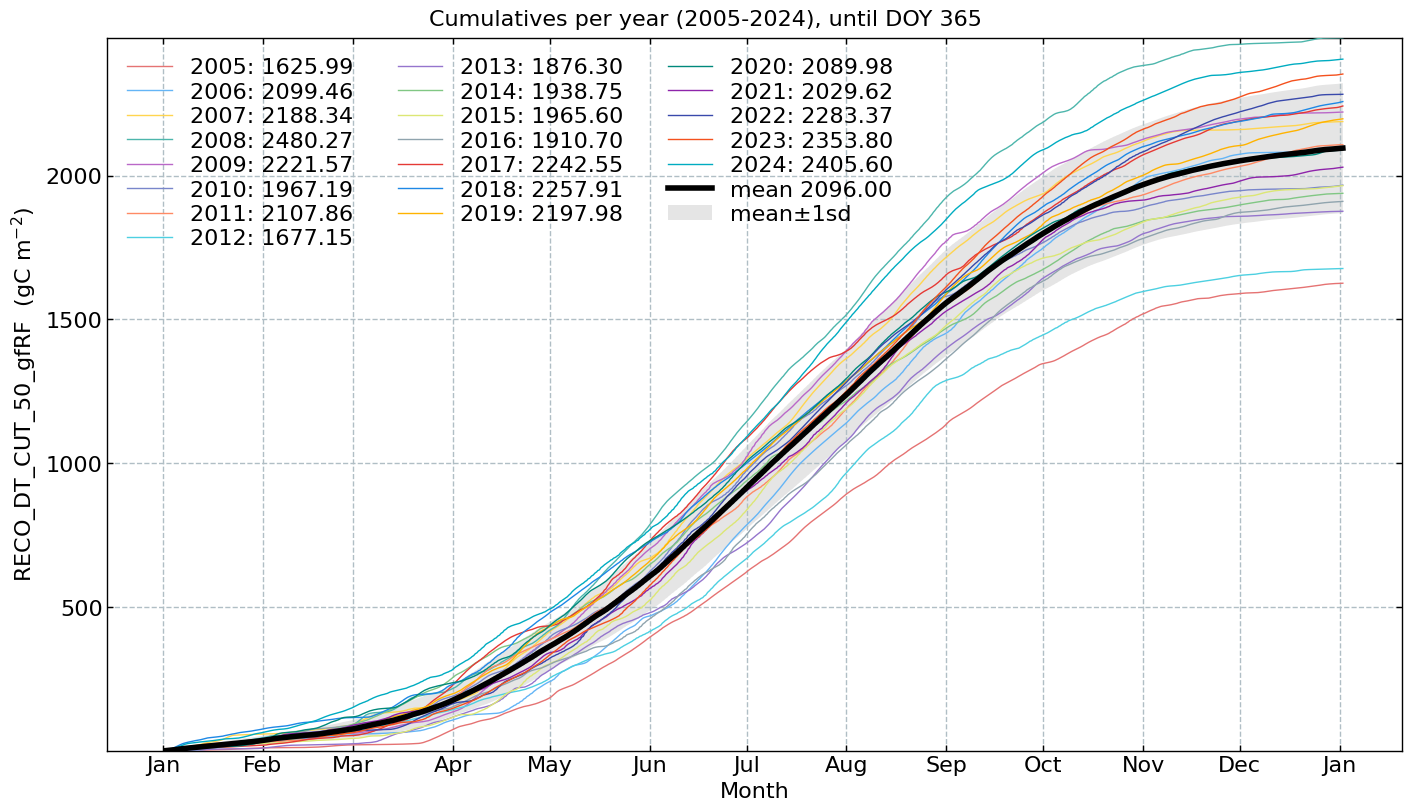

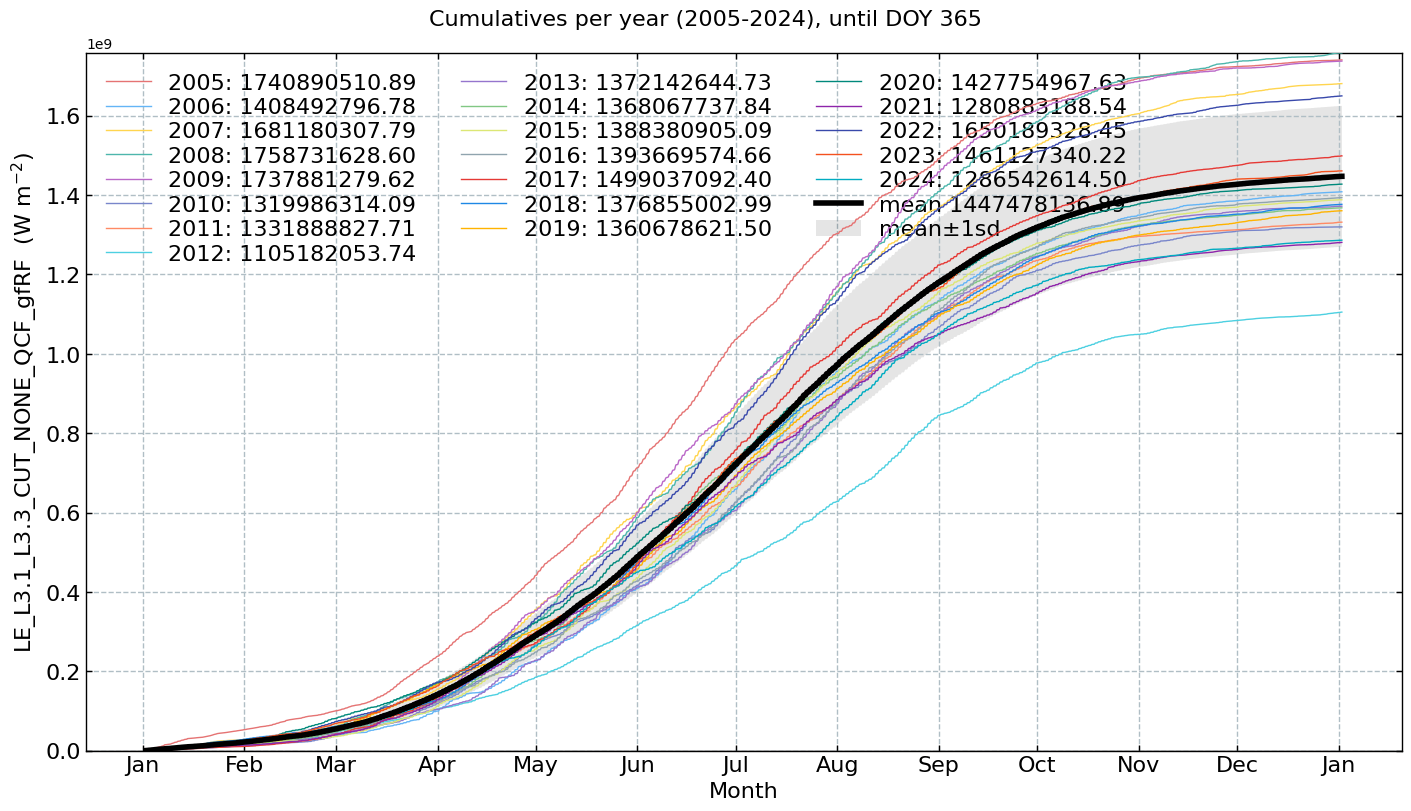

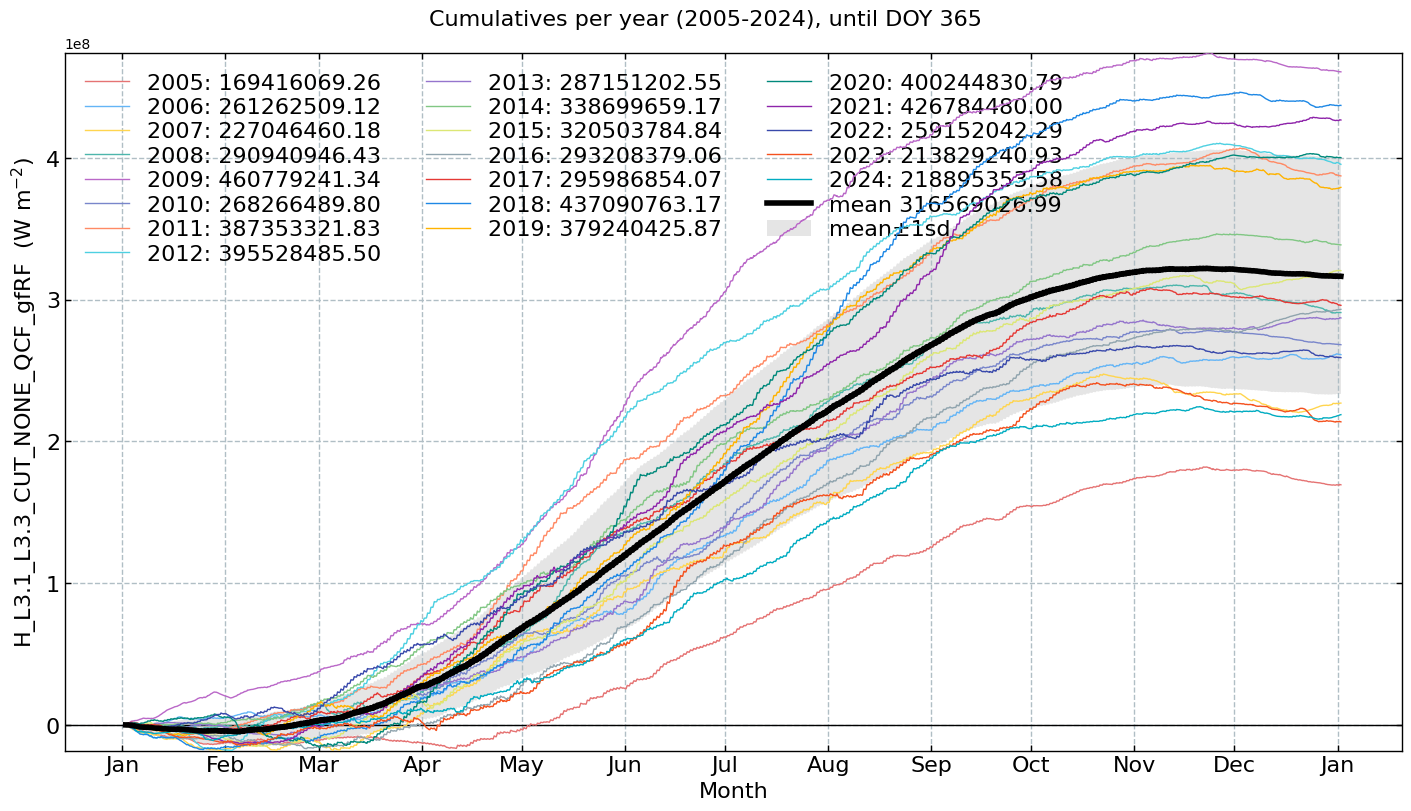

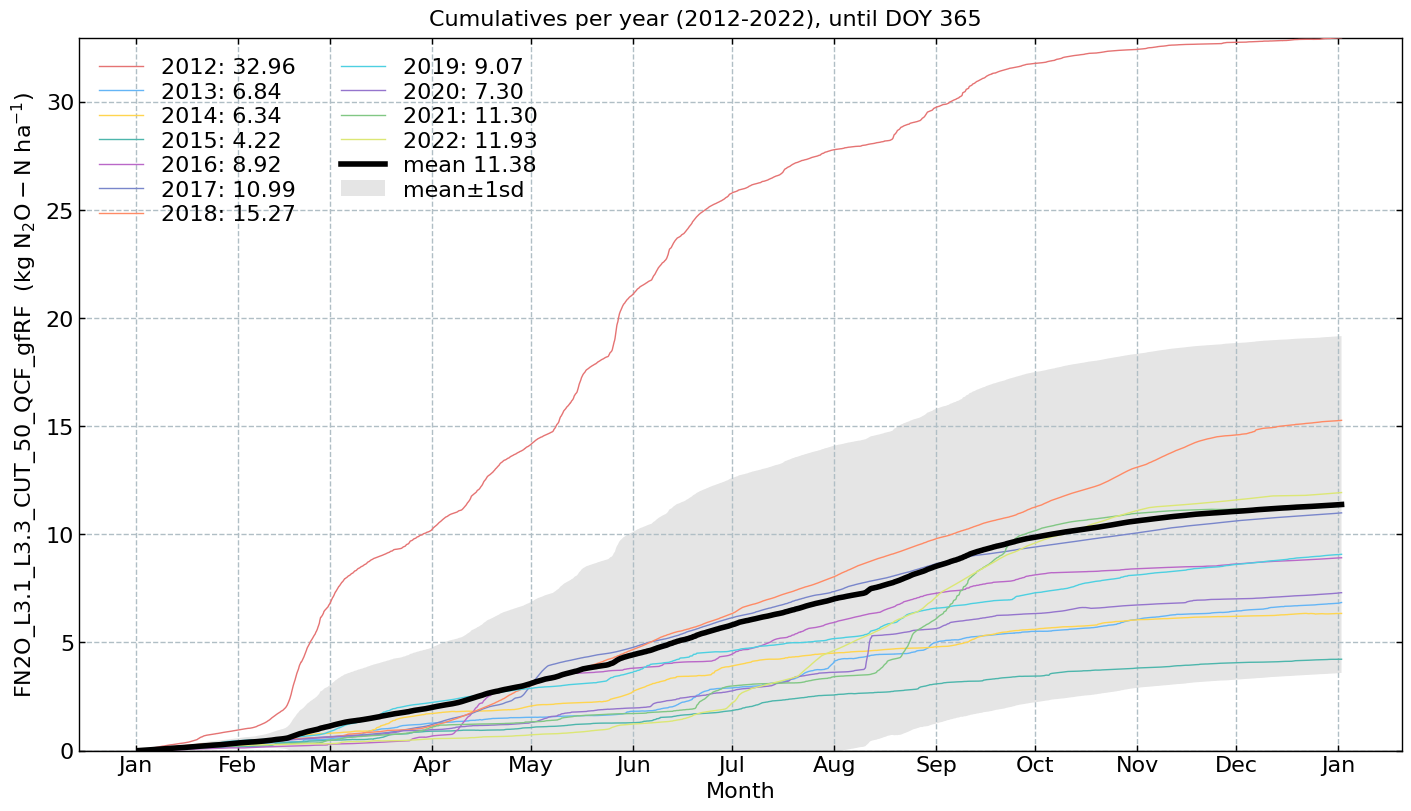

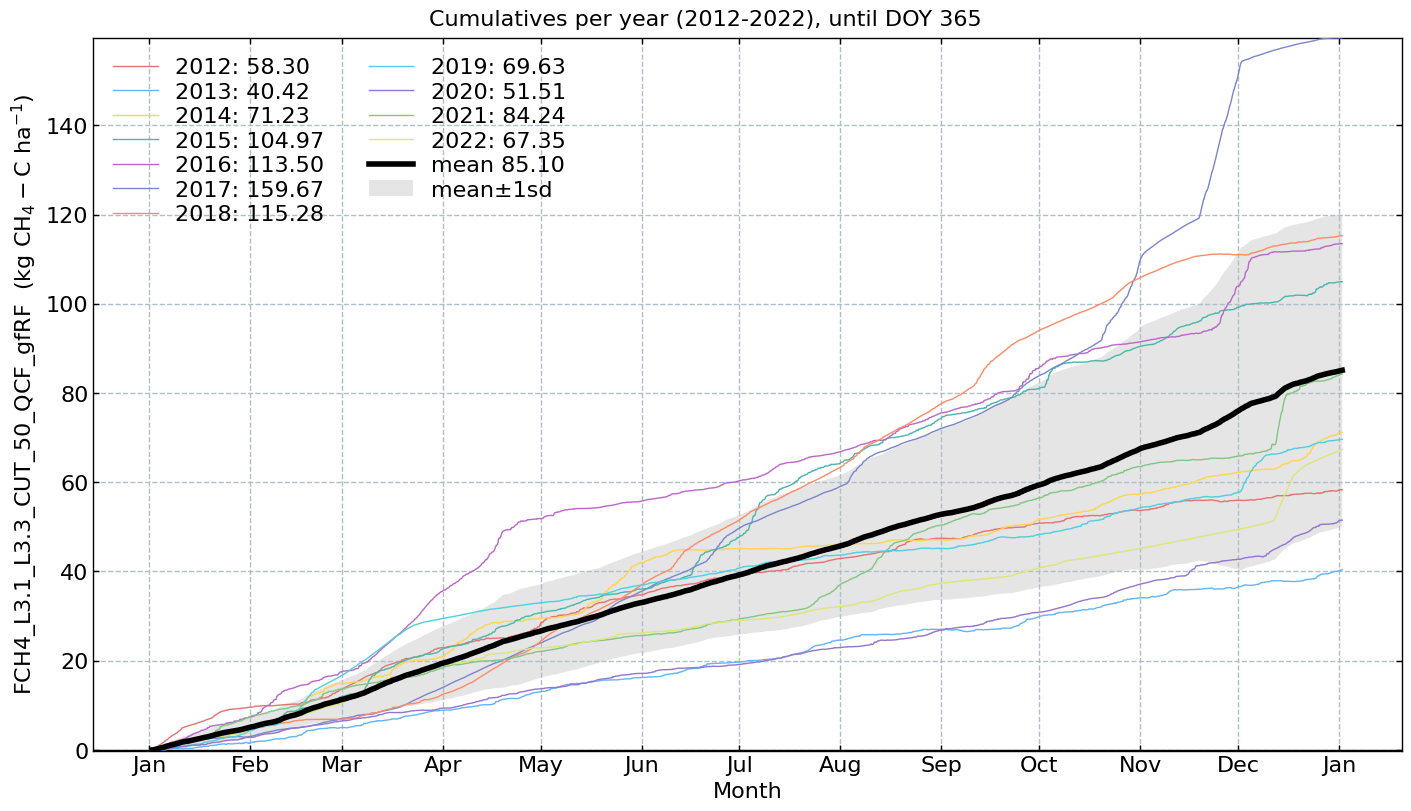

In [37]:
# Conversion factors and resulting units
conversions = {
    'NEE_L3.1_L3.3_CUT_50_QCF_gfRF': [0.02161926, r'($\mathrm{gC\ m^{-2}}$)'],  # umol CO2 m-2 s-1 --> gC m-2 30min-1
    'GPP_DT_CUT_50_gfRF': [0.02161926, r'($\mathrm{gC\ m^{-2}}$)'],  # umol CO2 m-2 s-1 --> gC m-2 30min-1
    'RECO_DT_CUT_50_gfRF': [0.02161926, r'($\mathrm{gC\ m^{-2}}$)'],  # umol CO2 m-2 s-1 --> gC m-2 30min-1
    'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF': [1800, r'($\mathrm{W\ m^{-2}}$)'],  # W m-2 s-1 --> W m-2 30min-1
    'H_L3.1_L3.3_CUT_NONE_QCF_gfRF': [1800, r'($\mathrm{W\ m^{-2}}$)'],  # W m-2 s-1 --> W m-2 30min-1
    'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF': [0.00050424109632, r'($\mathrm{kg\ N_2O-N\ ha^{-1}}$)'],  # nmol N2O m-2 s-1 --> kg N2O-N ha-1 30min-1
    'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF': [0.000216198, r'($\mathrm{kg\ CH_4-C\ ha^{-1}}$)']  # nmol CH4 m-2 s-1 --> kg CH4-C ha-1 30min-1
}

for f in fluxes:
    s = df[f].multiply(conversions[f][0])
    units = conversions[f][1]

    CumulativeYear(
        series=s,
        series_units=units,
        start_year=2005,
        end_year=2024,
        show_reference=True,
        excl_years_from_reference=None,
        highlight_year=None,
        highlight_year_color='#F44336').plot();

</br>

# **End of notebook**

In [38]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-05-16 16:02:48
